In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/home/checkdemo/Downloads/archive(2)/monkeypox_df.csv")

In [3]:
df

,ID,Status,Location,City,Country,Age,Gender,Date_onset,Date_confirmation,Symptoms,...,Travel_history_country,Genomics_Metadata,Confirmation_method,Source,Source_II,Date_entry,Date_last_modified,Source_III,Source_IV,Country_ISO3
0,1.0,confirmed,Guy's and St Thomas Hospital London,London,England,NaN,NaN,2022-04-29,2022-05-06,rash,...,Nigeria,West African Clade,RT-PCR,https://www.gov.uk/government/news/monkeypox-c...,https://www.who.int/emergencies/disease-outbre...,2022-05-18,2022-05-18,NaN,NaN,GBR
1,2.0,confirmed,Guy's and St Thomas Hospital London,London,England,NaN,NaN,2022-05-05,2022-05-12,rash,...,NaN,West African Clade,RT-PCR,https://www.gov.uk/government/news/monkeypox-c...,NaN,2022-05-18,2022-05-18,NaN,NaN,GBR
2,3.0,confirmed,London,London,England,NaN,NaN,2022-04-30,2022-05-13,vesicular rash,...,NaN,West African Clade,RT-PCR,https://www.gov.uk/government/news/monkeypox-c...,NaN,2022-05-18,2022-05-18,NaN,NaN,GBR
3,4.0,confirmed,London,London,England,NaN,Male,NaN,2022-05-15,vesicular rash,...,NaN,West African Clade,NaN,https://www.gov.uk/government/news/monkeypox-c...,NaN,2022-05-18,2022-05-18,NaN,NaN,GBR
4,5.0,confirmed,London,London,England,NaN,Male,NaN,2022-05-15,vesicular rash,...,NaN,West African Clade,NaN,https://www.gov.uk/government/news/monkeypox-c...,NaN,2022-05-18,2022-05-18,NaN,NaN,GBR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6567,6567.0,confirmed,NaN,NaN,Switzerland,NaN,NaN,NaN,2022-07-01,NaN,...,NaN,NaN,NaN,https://www.bag.admin.ch/bag/en/home/krankheit...,NaN,2022-07-01,2022-07-01,NaN,NaN,CHE
6568,6568.0,confirmed,NaN,NaN,Switzerland,NaN,NaN,NaN,2022-07-01,NaN,...,NaN,NaN,NaN,https://www.bag.admin.ch/bag/en/home/krankheit...,NaN,2022-07-01,2022-07-01,NaN,NaN,CHE
6569,6569.0,confirmed,NaN,NaN,Switzerland,NaN,NaN,NaN,2022-07-01,NaN,...,NaN,NaN,NaN,https://www.bag.admin.ch/bag/en/home/krankheit...,NaN,2022-07-01,2022-07-01,NaN,NaN,CHE
6570,6570.0,confirmed,NaN,NaN,Switzerland,NaN,NaN,NaN,2022-07-01,NaN,...,NaN,NaN,NaN,https://www.bag.admin.ch/bag/en/home/krankheit...,NaN,2022-07-01,2022-07-01,NaN,NaN,CHE


**Let us find the total monkeypox patients arranged by country.**

In [4]:
df1 = df.groupby('Country')['ID'].nunique().to_frame('total').reset_index()

In [5]:
df1

,Country,total
0,Argentina,8
1,Australia,14
2,Austria,37
3,Bahamas,1
4,Bangladesh,1
...,...,...
77,United States,459
78,Uruguay,4
79,Venezuela,1
80,Wales,10


Now let us sort the countries by number of cases and find out which country has the most cases.

In [9]:
df1['rank'] = df1['total'].rank(method='dense',ascending=False).astype(int)

Let us see countries with upto cases in the top 10

In [11]:
df1 = df1[df1['rank'] < 11]

In [12]:
lis = df1['Country'].to_list()

In [14]:
filterdf = df[df['Country'].isin(lis)]

In [15]:
import matplotlib.pyplot as plt

In [17]:
import seaborn as sns

Text(0, 0.5, 'Total Number of Cases')

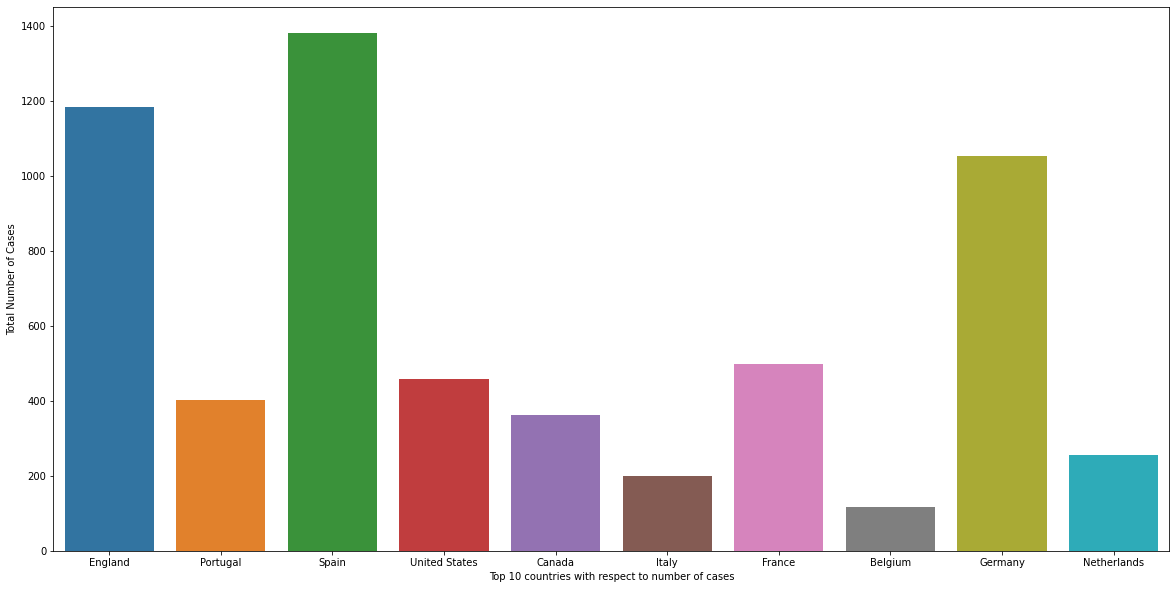

In [20]:
plt.figure(figsize=(20,10))

sns.countplot(x='Country',data= filterdf)

plt.xlabel("Top 10 countries with respect to number of cases")

plt.ylabel("Total Number of Cases")

**As we can see in the graph Spain has highest number of cases worldwide followed by England and Germany**

Now let us analyze the age column and see which age group is more prone to this disease

In [22]:
df['Age'].isna().sum()

5360

The above status shows that in the dataset we have 5360 number of null elements

In [25]:
df[df['Age'].notna()].groupby(['Age'])['ID'].nunique().to_frame('total').reset_index()

,Age,total
0,0-5,1
1,10-14,2
2,15-19,2
3,15-39,2
4,15-64,189
5,15-69,184
6,15-74,240
7,19-24,1
8,20-24,11
9,20-29,3


As far as the age column is concerned the data seems confusing as it has overlapping age groups wo we can't draw any concrete conclusion from this

In [26]:
df

,ID,Status,Location,City,Country,Age,Gender,Date_onset,Date_confirmation,Symptoms,...,Travel_history_country,Genomics_Metadata,Confirmation_method,Source,Source_II,Date_entry,Date_last_modified,Source_III,Source_IV,Country_ISO3
0,1.0,confirmed,Guy's and St Thomas Hospital London,London,England,NaN,NaN,2022-04-29,2022-05-06,rash,...,Nigeria,West African Clade,RT-PCR,https://www.gov.uk/government/news/monkeypox-c...,https://www.who.int/emergencies/disease-outbre...,2022-05-18,2022-05-18,NaN,NaN,GBR
1,2.0,confirmed,Guy's and St Thomas Hospital London,London,England,NaN,NaN,2022-05-05,2022-05-12,rash,...,NaN,West African Clade,RT-PCR,https://www.gov.uk/government/news/monkeypox-c...,NaN,2022-05-18,2022-05-18,NaN,NaN,GBR
2,3.0,confirmed,London,London,England,NaN,NaN,2022-04-30,2022-05-13,vesicular rash,...,NaN,West African Clade,RT-PCR,https://www.gov.uk/government/news/monkeypox-c...,NaN,2022-05-18,2022-05-18,NaN,NaN,GBR
3,4.0,confirmed,London,London,England,NaN,Male,NaN,2022-05-15,vesicular rash,...,NaN,West African Clade,NaN,https://www.gov.uk/government/news/monkeypox-c...,NaN,2022-05-18,2022-05-18,NaN,NaN,GBR
4,5.0,confirmed,London,London,England,NaN,Male,NaN,2022-05-15,vesicular rash,...,NaN,West African Clade,NaN,https://www.gov.uk/government/news/monkeypox-c...,NaN,2022-05-18,2022-05-18,NaN,NaN,GBR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6567,6567.0,confirmed,NaN,NaN,Switzerland,NaN,NaN,NaN,2022-07-01,NaN,...,NaN,NaN,NaN,https://www.bag.admin.ch/bag/en/home/krankheit...,NaN,2022-07-01,2022-07-01,NaN,NaN,CHE
6568,6568.0,confirmed,NaN,NaN,Switzerland,NaN,NaN,NaN,2022-07-01,NaN,...,NaN,NaN,NaN,https://www.bag.admin.ch/bag/en/home/krankheit...,NaN,2022-07-01,2022-07-01,NaN,NaN,CHE
6569,6569.0,confirmed,NaN,NaN,Switzerland,NaN,NaN,NaN,2022-07-01,NaN,...,NaN,NaN,NaN,https://www.bag.admin.ch/bag/en/home/krankheit...,NaN,2022-07-01,2022-07-01,NaN,NaN,CHE
6570,6570.0,confirmed,NaN,NaN,Switzerland,NaN,NaN,NaN,2022-07-01,NaN,...,NaN,NaN,NaN,https://www.bag.admin.ch/bag/en/home/krankheit...,NaN,2022-07-01,2022-07-01,NaN,NaN,CHE


Let us find out which city has been infected the most

In [31]:
df_city = df[(df['City'].str.isalpha()) & (df['City'].notna())].groupby('City')['ID'].nunique().to_frame('total').reset_index().sort_values(by='total',ascending=False)

In [32]:
df_city

,City,total
65,Madrid,121
106,Toronto,111
74,Montreal,63
10,Berlin,48
57,Lisbon,20
...,...,...
44,Günzburg,1
43,Guelph,1
42,Goiania,1
41,Gibraltar,1


**As we can see from the above result Madrid has the highest number of cases worldwide followed by toronto and montreal respectively.**

In [35]:
df_top_city =df[df['City'].isin(df_city.head(10)['City'].to_list())]

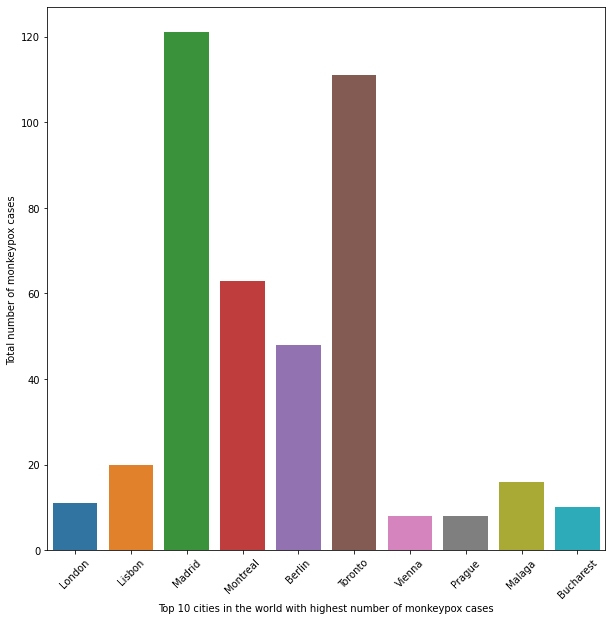

In [39]:
plt.figure(figsize=(10,10))
sns.countplot(x='City',data= df_top_city)

plt.xlabel('Top 10 cities in the world with highest number of monkeypox cases')

plt.ylabel('Total number of monkeypox cases ')

plt.xticks(rotation=45)

plt.show()


In [43]:
df['Symptoms'].notna().sum()

136

**So there are only 136 rows where symptoms have been registered. Let us try to figure out how much each symptom has contributed to the case history**

In [49]:
def func(x):

    k = list(set(x.split(", ")))

    for i in k:

        sym_count[i] = sym_count.get(i,0)+1

        

In [50]:
sym_count = {}

for index,row in df.iterrows():

    if(str(row['Symptoms'])!='nan'):

        func(row['Symptoms'])

In [52]:
symptom_lis = list(sym_count.values())

In [54]:
symptom_lis.sort(reverse = True)

In [55]:
sym_count_order = {i:v for i,v in sorted(sym_count.items(),key=lambda x:x[1],reverse=True) }

In [45]:
df.groupby(['Symptoms'])['ID'].nunique()

Symptoms
Fever, chills, fatigue, headache, skin lesions                                                    1
Fever, skin rashes                                                                                1
Headache, mild fever, sore throat, lesions                                                        1
Slight swallowing difficulties and an elevated temperature                                        1
Spots on skin, vesicuated lesions, skin scabs                                                     1
blisters                                                                                          1
blisters, high fever                                                                              1
cough, chills, muscle pain, pustule-like lesions                                                  1
erythema with vesicles and papules, difficulty breathing, headache, fever                         1
fever                                                                                      

In [65]:
top_symp = {i:v for i,v in sym_count_order.items() if v > 5 }

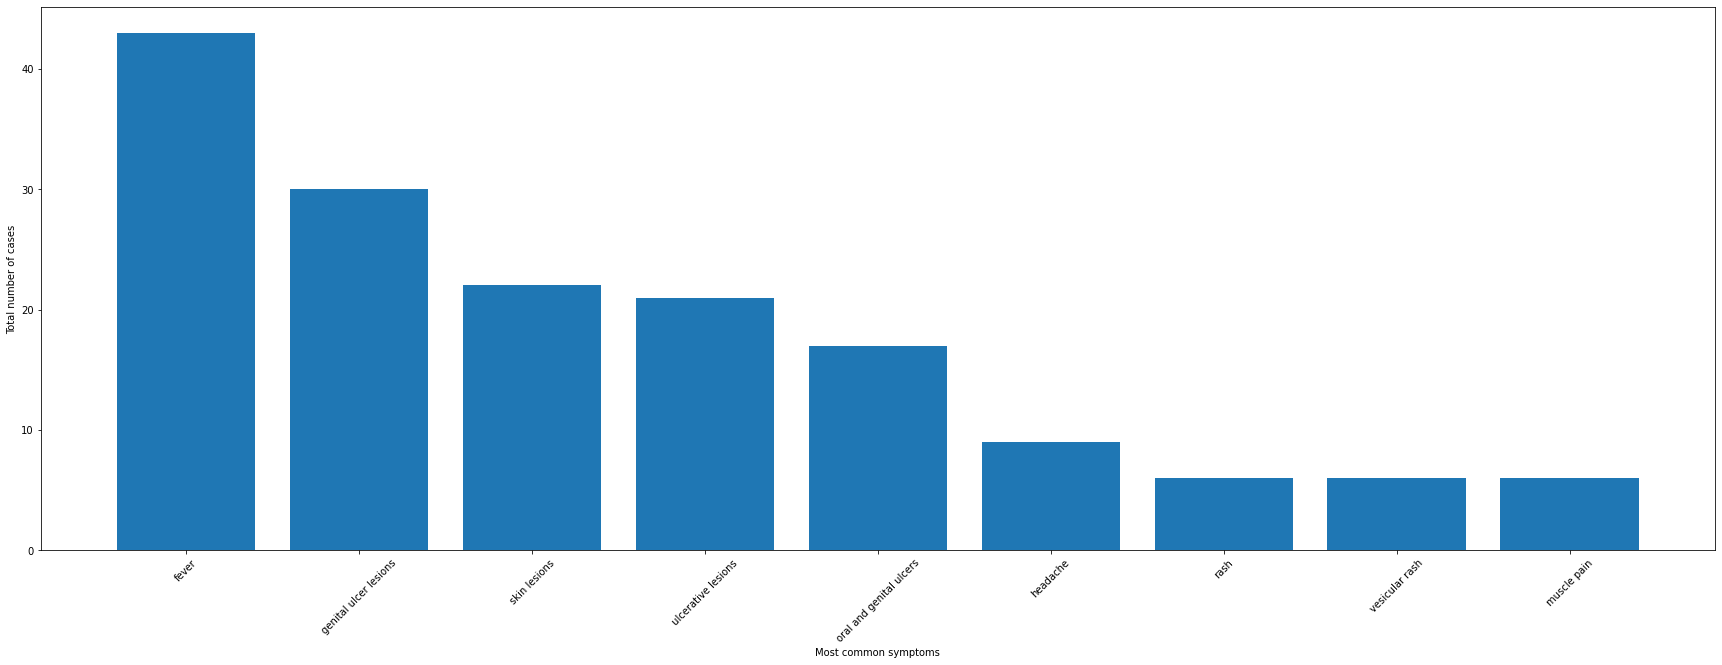

In [67]:
plt.figure(figsize=(30,10))
plt.bar(range(len(top_symp)),list(top_symp.values()),align='center')

plt.xticks(range(len(top_symp)),list(top_symp.keys()),rotation=45)

plt.xlabel("Most common symptoms")

plt.ylabel("Total number of cases")



plt.show()

**The above graph shows some of the common symptoms. Fever is the most common followed by genital ulcer lesions.**

In [73]:
travel_history = df[df['Travel_history_country'].notna()].groupby(['Travel_history_country'])['ID'].nunique().to_frame("total").reset_index().sort_values(by='total',ascending=False).head(5)

**Let us see  which are most frequent countries a patient has travelled to before getting caught by the disease**

In [74]:
travel_history

,Travel_history_country,total
18,Spain,15
7,England,7
15,Portugal,5
10,Germany,4
2,Bangladesh,2


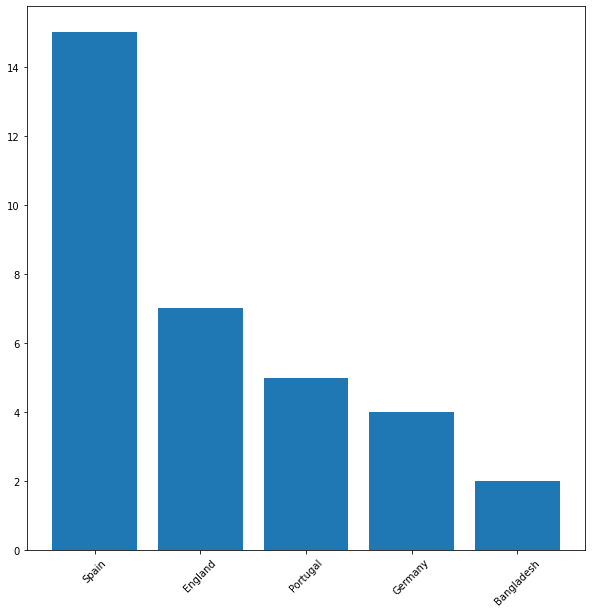

In [75]:
plt.figure(figsize=(10,10))

plt.bar(range(len(travel_history)),travel_history['total'])

plt.xticks(range(len(travel_history)),travel_history['Travel_history_country'].to_list(),rotation=45)

plt.show()

**As we can see from the above graph spain is the most visited country from where patients might have caught the infection. Spain is followed by England as per the information available.**


In [82]:
gender = df[(df['Gender'].notna()) & (df['ID'].notna())].groupby('Gender')['ID'].nunique().to_frame('total').reset_index()

In [83]:
gender

,Gender,total
0,Female,16
1,Male,1128


**As we can see most of the infected persons are male let us try to convert the same into percentage.**

In [84]:
gender['per'] = gender['total']/gender['total'].sum() * 100

In [85]:
gender

,Gender,total,per
0,Female,16,1.398601
1,Male,1128,98.601399


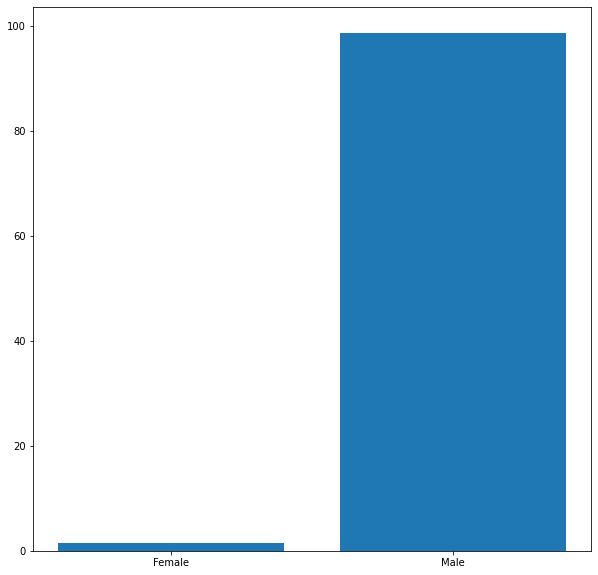

In [88]:
plt.figure(figsize=(10,10))

plt.bar(range(len(gender['per'])),gender['per'])

plt.xticks(range(len(gender)),gender['Gender'].to_list())

plt.show()

**From the above graph we can conclude most of the patients are male which is around 99% of the available data**

In [91]:
lis = []

In [92]:
for i in df.columns:

    if(i.startswith('Tr')):

        lis.append(i)

In [94]:
travel = df[lis]

In [96]:
travel.isna().sum()

Travel_history (Y/N/NA)    6346
Travel_history_entry       6551
Travel_history_start       6567
Travel_history_location    6514
Travel_history_country     6517
dtype: int64

In [99]:
travel[travel['Travel_history_start'].notna()]

,Travel_history (Y/N/NA),Travel_history_entry,Travel_history_start,Travel_history_location,Travel_history_country
0,Y,2022-05-04,late April,Lagos and Delta States,Nigeria
35,Y,early May,late April,NaN,Canada
193,Y,2022-05-16,2022-04-28,NaN,Spain
445,Y,2022-05-27,2022-05-23,Canary Island,Spain
3976,Y,NaN,2022-06-16,NaN,Germany


In [102]:
travel[travel['Travel_history_entry'].notna()].shape

(21, 5)

It is very difficult to draw any conclusion from the Travel_history_entry and Travel_history_start columns as there are so many missing values

In [105]:
travel[travel['Travel_history_location'].notna()].groupby(['Travel_history_location']).size().to_frame('total').reset_index().sort_values(by='total',ascending=False)

,Travel_history_location,total
7,Europe,19
6,Canary Islands,6
0,Africa,3
4,Berlin,2
24,"Spain, Britain",2
23,Spain,2
11,London,2
17,Nigeria,2
16,Mexico,1
26,West Africa,1


**The above result shows the travel history locations however there are so many missing values and many of them are overlapping as well. For example both Europe and Spain are considered different. So it is difficult to get into any conclusion from it.**

In [106]:
df['Confirmation_method'].notna().sum()

96

In [169]:
count_case = df.groupby('Date_confirmation')['ID'].nunique().to_frame('total').reset_index()

In [109]:
conf = df.groupby(['Confirmation_method'])['ID'].nunique().to_frame('total').reset_index().sort_values(by='total',ascending=False)
print(conf)

             Confirmation_method  total
5                         RT-PCR     50
7                 qPCR or RT-PCR     32
3                            PCR      9
0            Electron microscopy      1
1           Microbiological Test      1
2  Molecular and gene sequencing      1
4             PCR and sequencing      1
6                     Sequencing      1


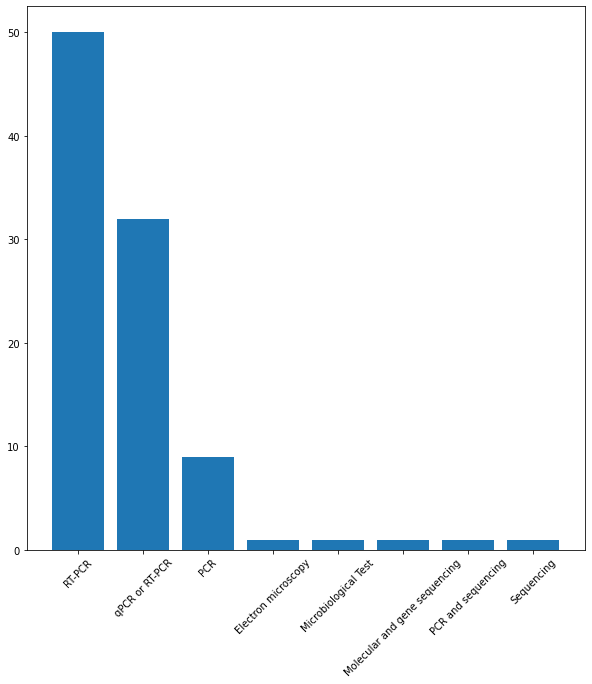

In [112]:
plt.figure(figsize=(10,10))

plt.bar(range(len(conf)),conf['total'])

plt.xticks(range(len(conf)),conf['Confirmation_method'].to_list(),rotation=45)

plt.show()

**The above graph shows different ways testing was carried out. RTPCR has been the most preferred method amongst all.**

In [217]:
df.groupby('Isolated (Y/N/NA)')['ID'].nunique().to_frame('total').reset_index()

,Isolated (Y/N/NA),total
0,Y,251


**As we can see there are only information of patients being isolated. So we can conclude goverments accross the world have taken prompt response to stop it. This can also be a case of many unreported cases.**

In [118]:
acc = df.groupby(['Date_confirmation']).size().to_frame('total').reset_index()

In [120]:
acc['cumulative'] =  acc['total'].cumsum()

In [129]:
acc['date'] = pd.to_datetime(acc['Date_confirmation'])

In [133]:
import datetime

In [139]:
begin = acc['date'].min()

end = acc['date'].max()

interval = 10

delta = (end-begin)/interval

In [140]:
delta

Timedelta('5 days 14:24:00')

In [144]:
date_list = []

In [145]:
for i in range(1,interval+1):

    date_list.append((begin+i*delta).strftime('%Y%m%d'))



In [170]:
count_case

,Date_confirmation,total
0,2022-05-06,1
1,2022-05-12,1
2,2022-05-13,1
3,2022-05-15,4
4,2022-05-17,3
5,2022-05-18,21
6,2022-05-19,16
7,2022-05-20,46
8,2022-05-21,16
9,2022-05-23,73


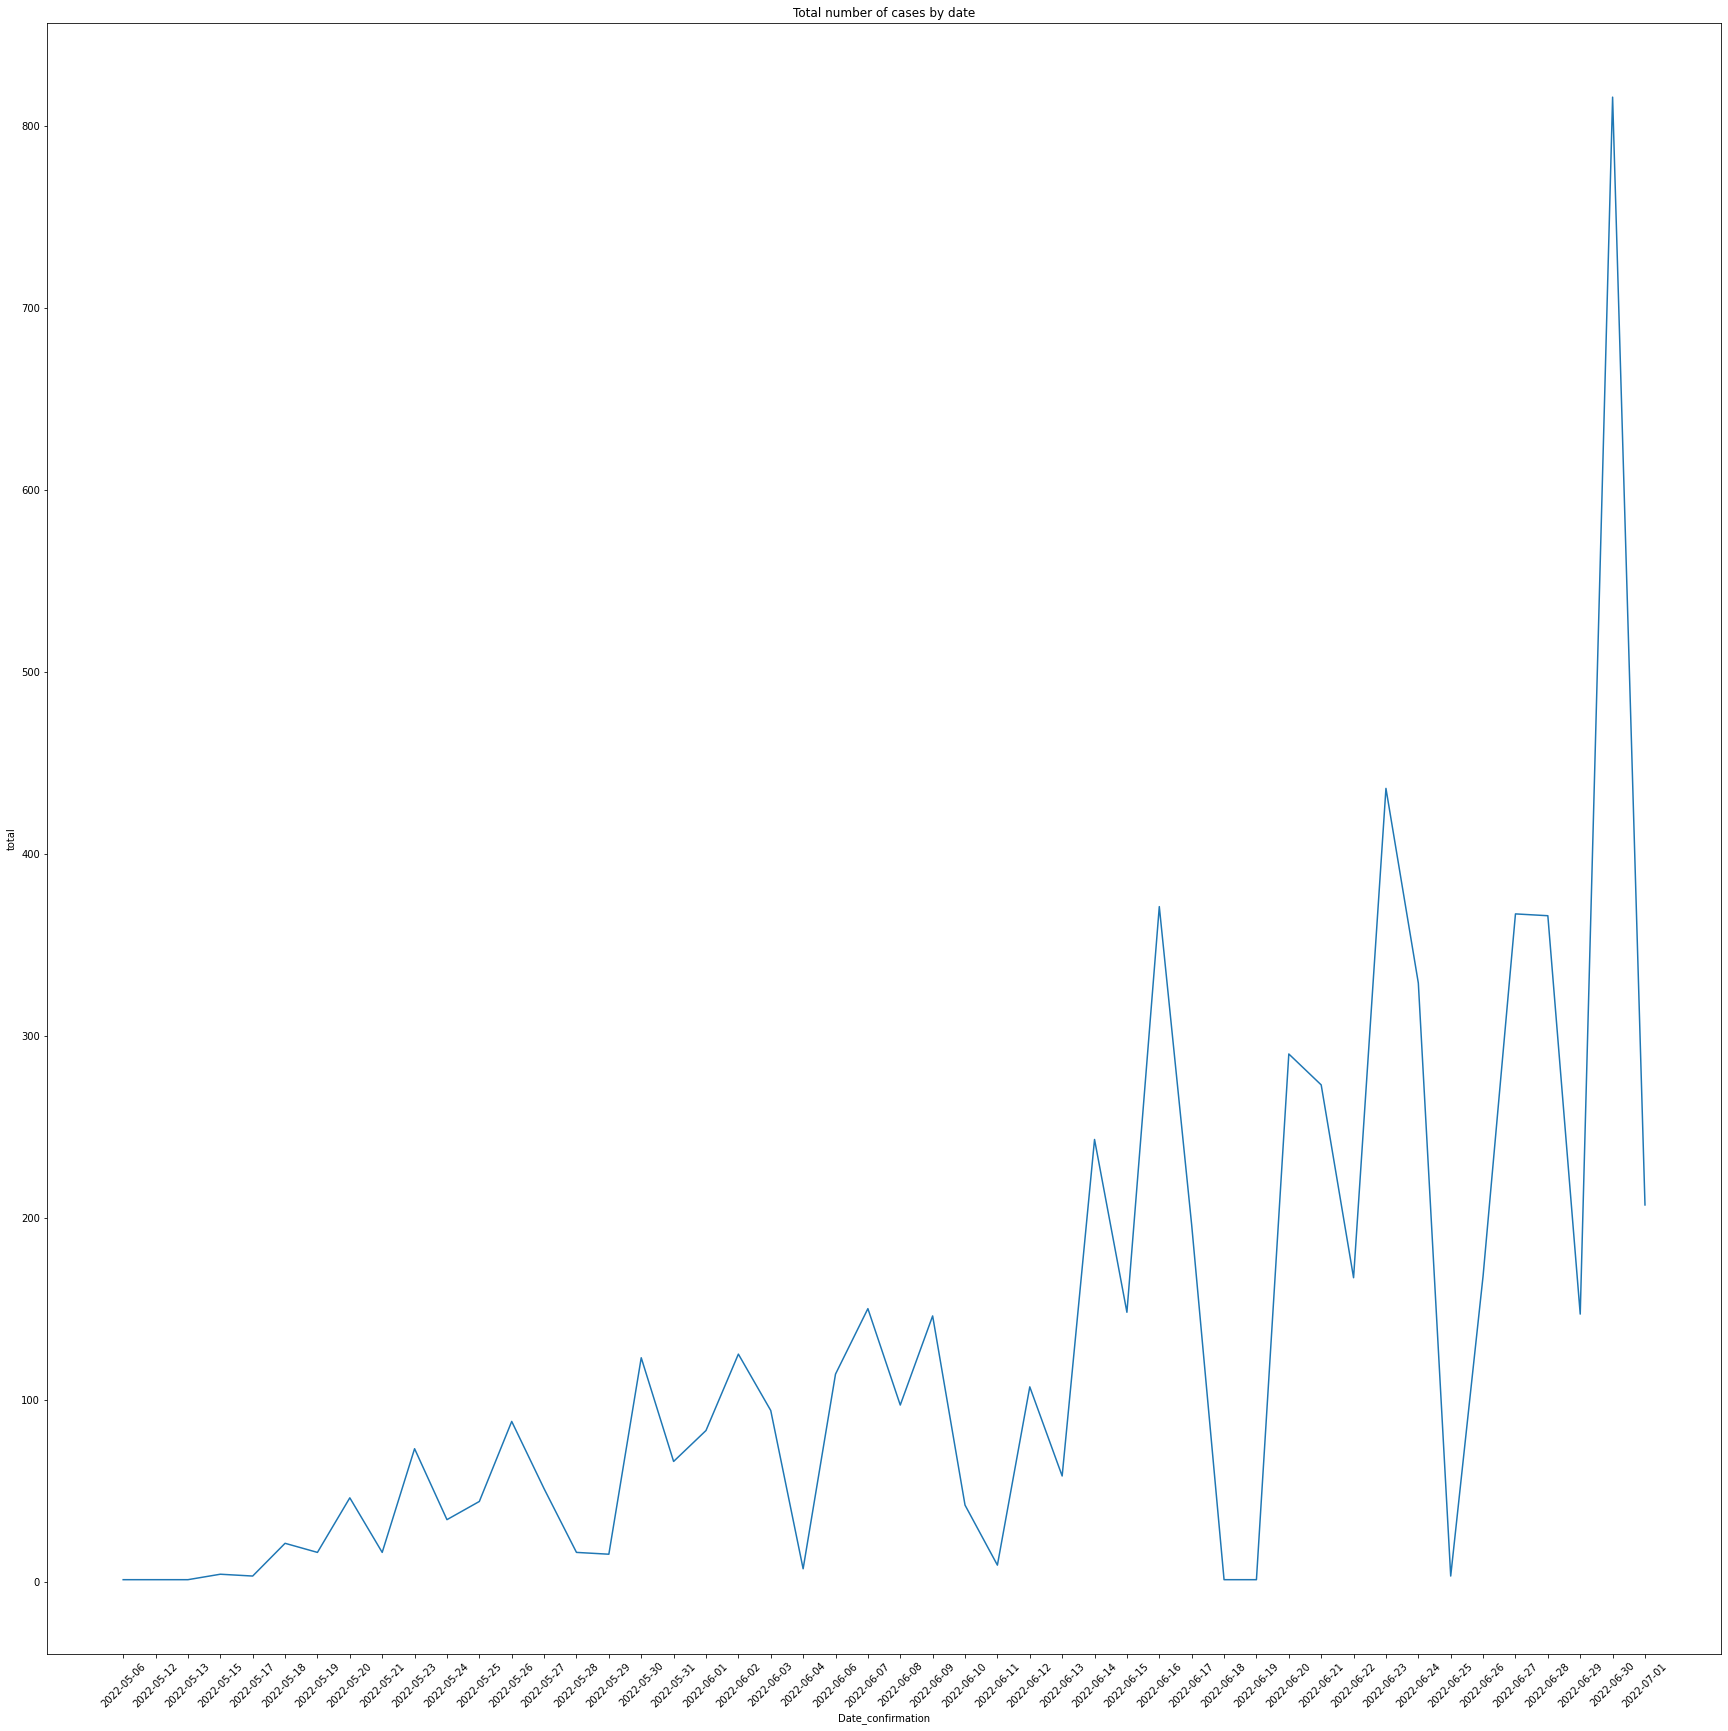

In [171]:
plt.figure(figsize=(30,30))
sns.lineplot(data=count_case,x='Date_confirmation',y='total')

plt.xticks(rotation=45)
plt.title('Total number of cases by date')
plt.show()

**We can see the number of cases has increases from the date of it's inception with few exceptions which could be due to error in data collection**

In [122]:
import seaborn as sns

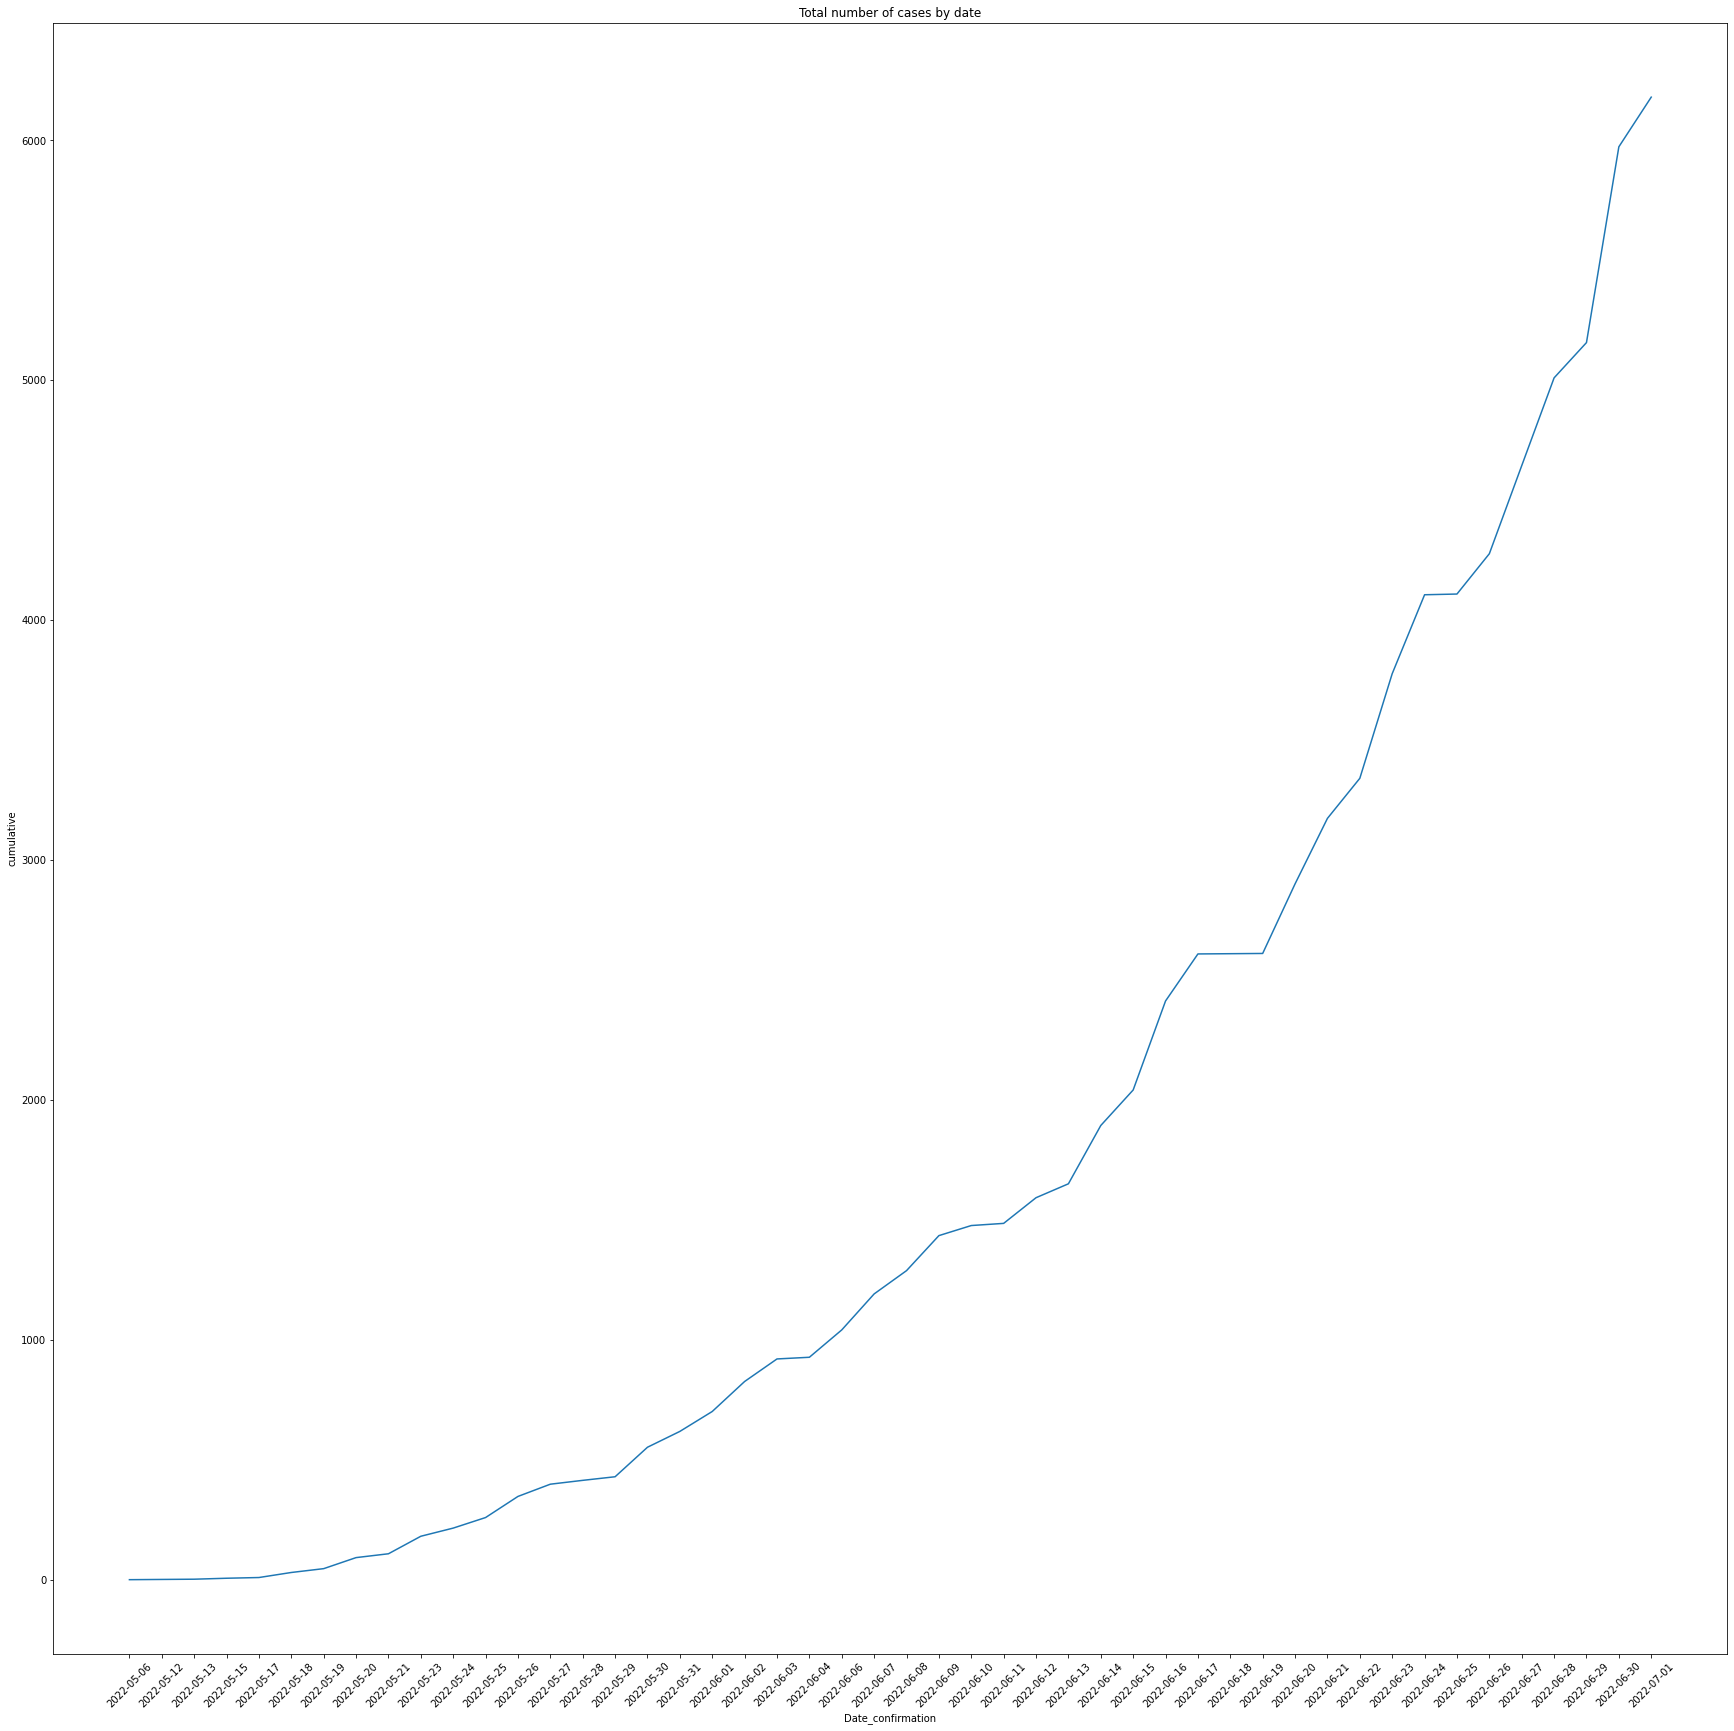

In [166]:
plt.figure(figsize=(30,30))
sns.lineplot(data=acc,x='Date_confirmation',y='cumulative')

plt.xticks(rotation=45)
plt.title('Total number of cases by date')
plt.show()

**The above graph shows the cumulative number of cases by date**

In [182]:
hosp = df.groupby(['Hospitalised (Y/N/NA)'])['ID'].nunique().to_frame('total').reset_index()

In [183]:
hosp

,Hospitalised (Y/N/NA),total
0,N,91
1,Y,89


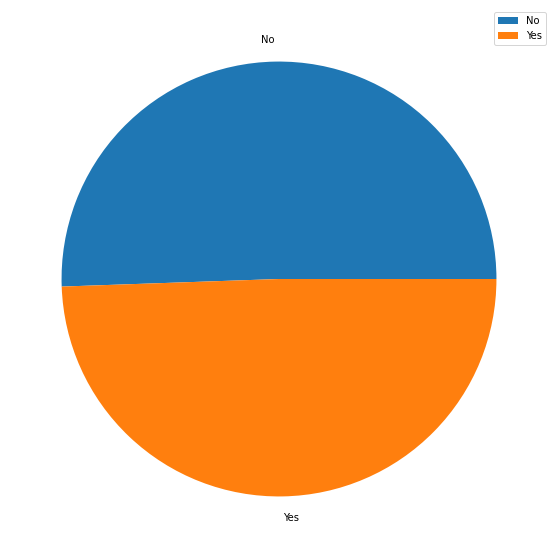

In [181]:
plt.figure(figsize=(10,10))
plt.pie(hosp['total'],labels=['No','Yes'])

plt.legend(['No','Yes'],loc='best')

plt.show()

**Here we can see hospitlization cases accross the world are almost same as home treatment/no hospitalization.**

In [209]:
import numpy as np

In [210]:
hosp_by_country = df.groupby(['Country','Hospitalised (Y/N/NA)'])['ID'].nunique().to_frame('total').reset_index()

#hosp_by_country['total'] = hosp_by_country['total'].astype(int)

hosp_pivoted = hosp_by_country.pivot(index='Country',columns='Hospitalised (Y/N/NA)',values='total').reset_index()

hosp_pivoted.fillna(0,inplace=True)
hosp_pivoted['per'] = np.round(hosp_pivoted['Y']/(hosp_pivoted['Y']+hosp_pivoted['N']) * 100,2)

hosp_pivoted


Hospitalised (Y/N/NA),Country,N,Y,per
0,Australia,3.0,2.0,40.00
1,Austria,7.0,2.0,22.22
2,Belgium,0.0,2.0,100.00
3,Bolivia,2.0,1.0,33.33
4,Brazil,3.0,2.0,40.00
5,Canada,1.0,1.0,50.00
6,Cayman Islands,1.0,0.0,0.00
7,Chile,0.0,1.0,100.00
8,Croatia,1.0,0.0,0.00
9,Czech Republic,0.0,1.0,100.00


**The above stats tell us the percentage of hospitalization by country. Let us remove those countries which have got very less cases (i.e less than 5)** 

In [211]:
hosp_pivoted[(hosp_pivoted['Y']+hosp_pivoted['N']) > 5 ]

Hospitalised (Y/N/NA),Country,N,Y,per
1,Austria,7.0,2.0,22.22
11,England,1.0,5.0,83.33
14,Germany,5.0,18.0,78.26
19,Italy,14.0,18.0,56.25
26,Portugal,38.0,0.0,0.00
32,Spain,2.0,11.0,84.62
35,United States,5.0,4.0,44.44


**Here we can see countries like spain,germany are having higher hospitalization rate. For other countries which have less hospitalization we can conclude the symptoms are not very dangerous or the country does not have enough healthcare infrastructure to cure it. However since the countries above shown seem to be developed we can conclude symptoms are not considered very dangerous.**

In [149]:
df

,ID,Status,Location,City,Country,Age,Gender,Date_onset,Date_confirmation,Symptoms,...,Travel_history_country,Genomics_Metadata,Confirmation_method,Source,Source_II,Date_entry,Date_last_modified,Source_III,Source_IV,Country_ISO3
0,1.0,confirmed,Guy's and St Thomas Hospital London,London,England,NaN,NaN,2022-04-29,2022-05-06,rash,...,Nigeria,West African Clade,RT-PCR,https://www.gov.uk/government/news/monkeypox-c...,https://www.who.int/emergencies/disease-outbre...,2022-05-18,2022-05-18,NaN,NaN,GBR
1,2.0,confirmed,Guy's and St Thomas Hospital London,London,England,NaN,NaN,2022-05-05,2022-05-12,rash,...,NaN,West African Clade,RT-PCR,https://www.gov.uk/government/news/monkeypox-c...,NaN,2022-05-18,2022-05-18,NaN,NaN,GBR
2,3.0,confirmed,London,London,England,NaN,NaN,2022-04-30,2022-05-13,vesicular rash,...,NaN,West African Clade,RT-PCR,https://www.gov.uk/government/news/monkeypox-c...,NaN,2022-05-18,2022-05-18,NaN,NaN,GBR
3,4.0,confirmed,London,London,England,NaN,Male,NaN,2022-05-15,vesicular rash,...,NaN,West African Clade,NaN,https://www.gov.uk/government/news/monkeypox-c...,NaN,2022-05-18,2022-05-18,NaN,NaN,GBR
4,5.0,confirmed,London,London,England,NaN,Male,NaN,2022-05-15,vesicular rash,...,NaN,West African Clade,NaN,https://www.gov.uk/government/news/monkeypox-c...,NaN,2022-05-18,2022-05-18,NaN,NaN,GBR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6567,6567.0,confirmed,NaN,NaN,Switzerland,NaN,NaN,NaN,2022-07-01,NaN,...,NaN,NaN,NaN,https://www.bag.admin.ch/bag/en/home/krankheit...,NaN,2022-07-01,2022-07-01,NaN,NaN,CHE
6568,6568.0,confirmed,NaN,NaN,Switzerland,NaN,NaN,NaN,2022-07-01,NaN,...,NaN,NaN,NaN,https://www.bag.admin.ch/bag/en/home/krankheit...,NaN,2022-07-01,2022-07-01,NaN,NaN,CHE
6569,6569.0,confirmed,NaN,NaN,Switzerland,NaN,NaN,NaN,2022-07-01,NaN,...,NaN,NaN,NaN,https://www.bag.admin.ch/bag/en/home/krankheit...,NaN,2022-07-01,2022-07-01,NaN,NaN,CHE
6570,6570.0,confirmed,NaN,NaN,Switzerland,NaN,NaN,NaN,2022-07-01,NaN,...,NaN,NaN,NaN,https://www.bag.admin.ch/bag/en/home/krankheit...,NaN,2022-07-01,2022-07-01,NaN,NaN,CHE


Now let us analyze the missing value distribution for each column

In [150]:
mis_dist = {}

In [152]:
for i in df.columns:

    mis_dist[i] = (df[i].isna().sum()/df.shape[0]) * 100



In [153]:
mis_dist

{'ID': 0.015216068167985392,
 'Status': 0.015216068167985392,
 'Location': 41.58551430310408,
 'City': 90.03347534996958,
 'Country': 0.015216068167985392,
 'Age': 81.5581253804017,
 'Gender': 82.57760194765672,
 'Date_onset': 99.55873402312842,
 'Date_confirmation': 5.964698721850274,
 'Symptoms': 97.93061472915399,
 'Hospitalised (Y/N/NA)': 97.26110772976263,
 'Date_hospitalisation': 99.6956786366403,
 'Isolated (Y/N/NA)': 96.18076688983567,
 'Date_isolation': 99.7869750456482,
 'Outcome': 99.98478393183201,
 'Contact_comment': 99.11746804625685,
 'Contact_ID': 99.80219111381618,
 'Contact_location': 99.90870359099209,
 'Travel_history (Y/N/NA)': 96.5611685940353,
 'Travel_history_entry': 99.68046256847231,
 'Travel_history_start': 99.92391965916008,
 'Travel_history_location': 99.11746804625685,
 'Travel_history_country': 99.16311625076081,
 'Genomics_Metadata': 99.63481436396835,
 'Confirmation_method': 98.5392574558734,
 'Source': 0.015216068167985392,
 'Source_II': 72.85453438831

In [154]:
import matplotlib.pyplot as plt

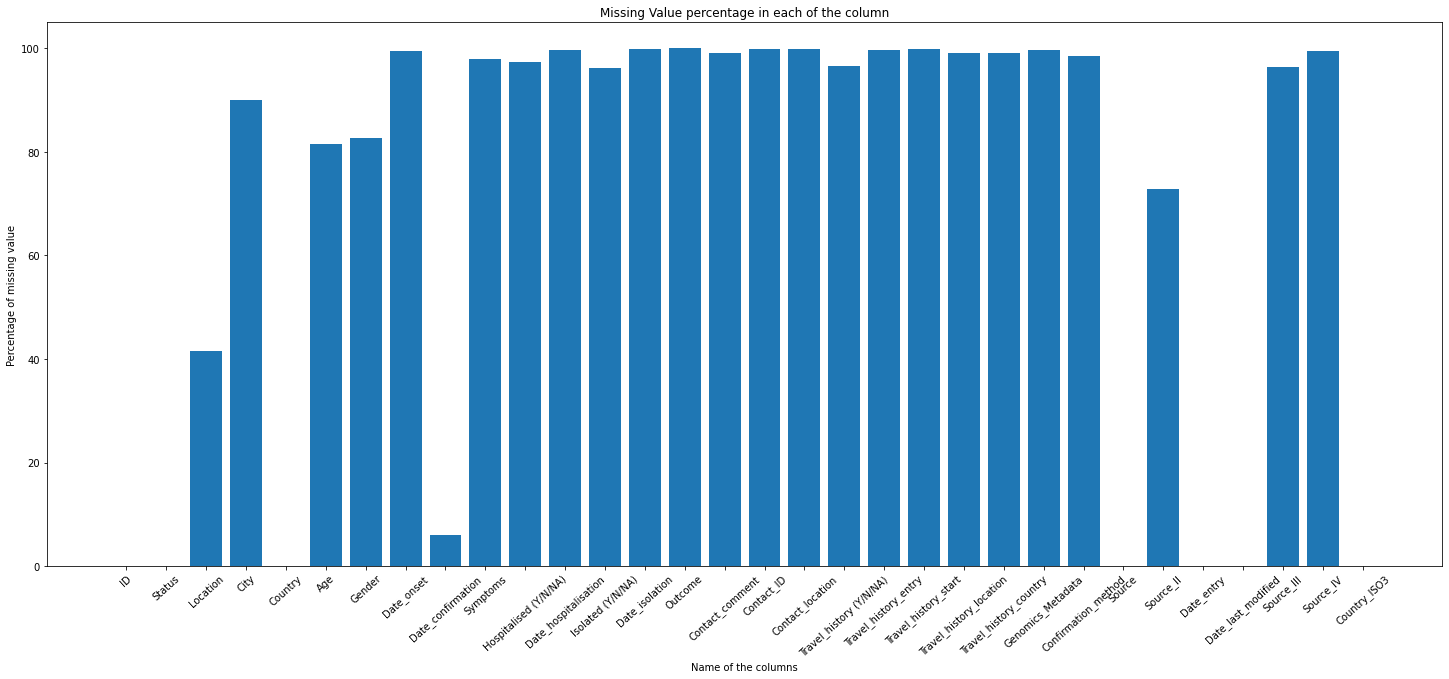

In [164]:
plt.figure(figsize=(25,10))

plt.bar(range(len(mis_dist)),list(mis_dist.values()))

plt.xticks(range(len(mis_dist)),list(mis_dist.keys()),rotation=42)

plt.title("Missing Value percentage in each of the column")

plt.xlabel("Name of the columns")

plt.ylabel("Percentage of missing value")

plt.show()

**As we can see the data has so many missing values. We hope that the dataset would be curated by the contributors in future**

# Conclusion

**We can summarize our whole analysis in the following points**

* **Spain has highest number of cases worldwide followed by England and Germany** 
* **Amongst cities Madrid has the highest number of cases followed by Toronto and Montreal**
* **Fever is the most common followed by genital ulcer lesions**

* **Spain is the most visited country from where patients might have caught the infection. Spain is followed by England as per the information available**
* **Most of the infected patients are male which is around 99% of the reported data**

* **RTPCR is the most preferred method for testing**
* **Number of cases have incresed gradually accross the world with few exceptions which could be due to unreported cases**
* **The number of patients hospitalized is almost same as the people not hospitalized,this could be due to lack of healthcare infrastructure or lack of awareness**

* **Spain,Germany,England have got higher hospitalization rate.**

* **This dataset has so much missing data to draw any concrete conclusion. We hope contributors will add more to the dataset in the coming future** 


